In [1]:
import user_functions, pandas
from sklearn import ensemble
import numpy as np

In [29]:
guided_motion_filenames = ["ExampleData/FourSpeedData/accR.csv", "ExampleData/FourSpeedData/gyrR.csv", 
                           "ExampleData/FourSpeedData/accL.csv", "ExampleData/FourSpeedData/gyrL.csv"]
guided_keylog_filename = "ExampleData/FourSpeedData/log.csv"

[[normalized_data],  # List of normalized data sets, with each motions axes in a separate DataFrame
 [combined_axes_data],    # List of normalized data sets, with all motion axes for each set in one DataFrame
 [peaks_indices],       # Indices of peaks for each column of combined
 [keylog_data],
 mouselogs] = user_functions.package_data([guided_motion_filenames], [guided_keylog_filename], [])

In [30]:
user_functions.sync_time(keylog_data, combined_axes_data.index[504])


In [31]:
keylog_data['UNX2'] = keylog_data.Time.astype('int64')//10**6
keylog_data

,Time,Char,UNX2
1,2017-07-17 19:12:42.575,<Enter>,1500318762575
2,2017-07-17 19:12:47.876,<Enter>,1500318767876
3,2017-07-17 19:12:58.960,e,1500318778960
4,2017-07-17 19:12:59.483,z,1500318779483
5,2017-07-17 19:13:00.016,܂,1500318780016
6,2017-07-17 19:13:00.526,n,1500318780526
7,2017-07-17 19:13:01.074,p,1500318781074
8,2017-07-17 19:13:01.584,k,1500318781584
9,2017-07-17 19:13:02.165,e,1500318782165
10,2017-07-17 19:13:02.724,a,1500318782724


In [32]:
combined_axes_data['UNX2'] = combined_axes_data.index.astype('int64')//10**6
combined_axes_data

,AccXR,AccYR,AccZR,GyrXR,GyrYR,GyrZR,AccXL,AccYL,AccZL,GyrXL,GyrYL,GyrZL,UNX2
Time,,,,,,,,,,,,,
2017-07-17 19:12:31.632,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.083984,-0.018555,0.000854,0.003128,-0.000343,0.010109,1500318751632
2017-07-17 19:12:31.658,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.083984,-0.018555,0.000854,0.000000,-0.000343,-0.001183,1500318751658
2017-07-17 19:12:31.685,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.081932,-0.022597,0.005270,-0.003967,-0.006523,-0.001373,1500318751685
2017-07-17 19:12:31.711,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.079956,-0.026489,0.009521,-0.002441,0.017357,0.011444,1500318751711
2017-07-17 19:12:31.738,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.080143,-0.025059,0.010641,-0.019493,0.027161,0.021133,1500318751738
2017-07-17 19:12:31.764,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.080322,-0.023682,0.011719,-0.015411,0.046120,0.024643,1500318751764
2017-07-17 19:12:31.791,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.089402,-0.020448,0.004505,-0.009460,0.007820,0.021935,1500318751791
2017-07-17 19:12:31.817,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.098145,-0.017334,-0.002441,-0.000458,-0.004959,0.011024,1500318751817
2017-07-17 19:12:31.844,-0.065918,-0.033813,-0.016846,0.000229,0.004501,-0.001106,-0.090744,-0.021874,-0.001944,-0.000725,-0.027733,0.009041,1500318751844


In [33]:
keylog_np = pandas.DataFrame.as_matrix(keylog_data)
combined_axes_np = pandas.DataFrame.as_matrix(combined_axes_data)

In [34]:
starttime = keylog_np[0][2]
keylog_np[:,2] = keylog_np[:,2] - starttime
combined_axes_np[:,12] = combined_axes_np[:,12] - starttime
combined_axes_np = combined_axes_np[504:,:]

In [35]:
from scipy.interpolate import interp1d
time_x = combined_axes_np[:,12]
data_y = combined_axes_np[:,:12]
f2 = interp1d(np.transpose(time_x), np.transpose(data_y), kind='cubic')
time_new = np.linspace(0, 298140, 29815)
print(time_new)
print(np.shape(time_x))

[  0.00000000e+00   1.00000000e+01   2.00000000e+01 ...,   2.98120000e+05
   2.98130000e+05   2.98140000e+05]
(18039,)


In [36]:
interpolated = np.transpose(f2(time_new))
interpolated = interpolated[0:29780,:]
print(interpolated)
print(np.shape(interpolated))

[[  2.65136719e-01   3.36914062e-02   1.51611328e-01 ...,   7.97161646e-04
   -6.26771096e-02  -2.31531357e-04]
 [  2.27836895e-01   2.71912796e-02   1.07711038e-01 ...,   2.75367400e-03
   -7.73268988e-02  -3.86611118e-03]
 [  1.90533498e-01   2.06897263e-02   6.38113489e-02 ...,   5.13839716e-03
   -6.96236964e-02  -1.00585547e-02]
 ..., 
 [  1.93962138e-01  -1.65832110e-02  -2.89903622e-02 ...,  -1.80783972e-02
   -7.24423364e-03  -1.22489416e-02]
 [  1.92914454e-01  -3.02669800e-02  -2.44030878e-03 ...,  -2.04419982e-02
   -1.36201973e-02  -1.39099677e-02]
 [  1.89415574e-01  -4.12079309e-02   2.13826843e-02 ...,  -2.27585163e-02
   -6.89642294e-03  -1.53773758e-02]]
(29780, 12)


In [37]:
leng = len(interpolated)
leng

29780

In [38]:
data_slide = np.zeros((29770,10,12))
for i in range(0,leng-10): #100ms
    data_slide[i,:,:] = interpolated[i:i+10,:]
    
print (data_slide.shape)

(29770, 10, 12)


In [39]:
data_pause = np.zeros((29680,100,12))
for i in range(0,leng-100): #1000ms
    data_pause[i,:,:] = interpolated[i:i+100,:]

print(data_pause.shape)

(29680, 100, 12)


In [40]:
myset = set(keylog_np[:,1])
keylog_np_2 = np.copy(keylog_np)
myset

{' ',
 '-',
 '<BckSp>',
 '<Enter>',
 '\\',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 'y',
 'z',
 '܂'}

In [41]:
keylog_np[:,1] = 1
print(keylog_np)

[[Timestamp('2017-07-17 19:12:42.575000') 1 0]
 [Timestamp('2017-07-17 19:12:47.876000') 1 5301]
 [Timestamp('2017-07-17 19:12:58.960000') 1 16385]
 ..., 
 [Timestamp('2017-07-17 19:17:39.804000') 1 297229]
 [Timestamp('2017-07-17 19:17:40.101000') 1 297526]
 [Timestamp('2017-07-17 19:17:40.309000') 1 297734]]


In [42]:
labels = np.zeros((29780,1))
for key in keylog_np:
    index = int(key[2]/10)
    labels[index] = key[1]
    
print(np.sum(labels))
print (labels)
print(labels.shape)

621.0
[[ 1.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
(29780, 1)


In [43]:
labels_sliding = np.zeros((29680,1))
for i in range(0,leng-100): #1000ms
    labels_sliding[i] = np.amax(labels[i:i+100])

print(np.sum(labels_sliding))
print (np.reshape(labels_sliding,(10,2968)))
print(labels_sliding.shape)

20700.0
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
(29680, 1)


In [44]:
keylog_np_2[604]
#array([Timestamp('2017-07-17 19:17:37.855000'), 'a', 295280], dtype=object)

array([Timestamp('2017-07-17 19:17:30.877000'), '<Enter>', 288302], dtype=object)

In [18]:
print(labels_sliding[28832])

[ 0.]


In [19]:
import numpy as np
import scipy.io

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten
from keras.layers.core import Permute, Reshape
from keras import backend as K
from hmmlearn import hmm

np.random.seed(2)

Using TensorFlow backend.


In [20]:
X_train0 = data_pause[:26000]
Y_train = labels_sliding[0:26000].reshape(-1).astype(np.uint8)
X_test0 = data_pause[26000:]
Y_test = labels_sliding[26000:]
print(np.shape(X_train0))
print(np.shape(Y_train))
print(np.shape(X_test0))
print(np.shape(Y_test))

(26000, 100, 12)
(26000,)
(3680, 100, 12)
(3680, 1)


In [21]:
num_classes = 2
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [22]:
def _data_reshaping(X_tr, X_va, network_type):
    _, win_len, dim = X_tr.shape
    print(network_type)
    if network_type=='CNN' or network_type=='ConvLSTM':
        
        # make it into (frame_number, dimension, window_size, channel=1) for convNet
        X_tr = np.swapaxes(X_tr,1,2)
        X_va = np.swapaxes(X_va,1,2)

        X_tr = np.reshape(X_tr, (-1, dim, win_len, 1))
        X_va = np.reshape(X_va, (-1, dim, win_len, 1))
        
    if network_type=='MLP':
        print('MLP...')
        X_tr = np.reshape(X_tr, (-1, dim*win_len))
        X_va = np.reshape(X_va, (-1, dim*win_len))
    
    return X_tr, X_va


In [23]:

def model_variant(model, num_feat_map, dim, network_type):
    print(network_type)
    if network_type == 'ConvLSTM':
        model.add(Permute((2, 1, 3))) # for swap-dimension
        model.add(Reshape((-1,num_feat_map*dim)))
        model.add(LSTM(32, return_sequences=False, stateful=False))
        model.add(Dropout(0.5))
    if network_type == 'CNN':
        
        model.add(Flatten())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.5))

        
def model_conv(model, num_feat_map):
    model.add(Conv2D(num_feat_map, kernel_size=(1, 5),
                 activation='relu',
                 input_shape=(dim, win_len, 1),
                 padding='same'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(num_feat_map, kernel_size=(1, 5), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(0.5))
    
def model_LSTM(model):
    model.add(LSTM(num_hidden_lstm, 
               input_shape=(win_len,dim), 
               return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(num_hidden_lstm, return_sequences=False))
    model.add(Dropout(0.5))

def model_MLP(model, num_hidden_mlp):
    model.add(Dense(num_hidden_mlp, activation='relu', input_shape=(dim*win_len,)))
    model.add(Dropout(0.5))
    model.add(Dense(num_hidden_mlp, activation='relu'))
    model.add(Dropout(0.5))
    
def model_output(model):
    model.add(Dense(num_classes, activation='softmax'))
    

In [24]:
batch_size = 512
num_feat_map = 16
num_hidden_mlp = 128
num_hidden_lstm = 64

#network_type = 'CNN'
network_type = 'ConvLSTM'
#network_type = 'LSTM'
#network_type = 'MLP'
_, win_len, dim = X_train0.shape
print(win_len)
print(dim)

X_train, X_test = _data_reshaping(X_train0, X_test0, network_type)


100
12
ConvLSTM


In [25]:
print(X_train.shape)

(26000, 12, 100, 1)


In [26]:

print('building the model ... ')
model = Sequential()


if network_type=='CNN' or network_type=='ConvLSTM':
    model_conv(model, num_feat_map)
    model_variant(model, num_feat_map, dim, network_type)
if network_type=='LSTM':
    model_LSTM(model)
if network_type=='MLP': 
    model_MLP(model, num_hidden_mlp) 
    
    
    
    
model_output(model)    
model.summary()


building the model ... 
ConvLSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 12, 100, 16)       96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 50, 16)        1296      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 25, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 25, 16)        0         
_________________________________________________________________
permute_1 (Permute)          (None, 25, 12,

In [27]:
epochs = 10

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

H = model.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            shuffle=True,
            validation_data=(X_test, Y_test))


Train on 26000 samples, validate on 3680 samples
Epoch 1/10
26000/26000 [==============================] - 45s - loss: 0.5543 - acc: 0.7153 - val_loss: 0.2821 - val_acc: 0.8815
Epoch 2/10
26000/26000 [==============================] - 44s - loss: 0.2675 - acc: 0.8885 - val_loss: 0.2178 - val_acc: 0.8899
Epoch 3/10
26000/26000 [==============================] - 42s - loss: 0.1796 - acc: 0.9275 - val_loss: 0.1815 - val_acc: 0.9204
Epoch 4/10
26000/26000 [==============================] - 42s - loss: 0.1382 - acc: 0.9471 - val_loss: 0.1562 - val_acc: 0.9337
Epoch 5/10
26000/26000 [==============================] - 41s - loss: 0.1167 - acc: 0.9570 - val_loss: 0.1611 - val_acc: 0.9288
Epoch 6/10
26000/26000 [==============================] - 42s - loss: 0.1103 - acc: 0.9571 - val_loss: 0.1562 - val_acc: 0.9345
Epoch 7/10
26000/26000 [==============================] - 41s - loss: 0.1019 - acc: 0.9610 - val_loss: 0.1664 - val_acc: 0.9315
Epoch 8/10
26000/26000 [==============================]

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(Y_test, axis=1)
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
class_wise_f1 = np.round(f1_score(y_true, y_pred, average=None)*100)*0.01
print('the mean-f1 score: {:.2f}'.format(np.mean(class_wise_f1)))


[[ 904  109]
 [ 142 2525]]
the mean-f1 score: 0.92


In [72]:
## MLP
[[ 710  303]
 [  57 2610]]
the mean-f1 score: 0.87

## LSTM
[[ 742  271]
 [ 138 2529]]
    
## CNN
[[ 784  229]
 [  76 2591]]

## ConvLSTM
[[ 905  108]
 [ 128 2539]]
the mean-f1 score: 0.92

SyntaxError: invalid syntax (<ipython-input-72-3702aa542721>, line 2)

In [45]:
import matplotlib.pyplot as plt

In [46]:
keylog_np_3 = np.copy(keylog_np_2)

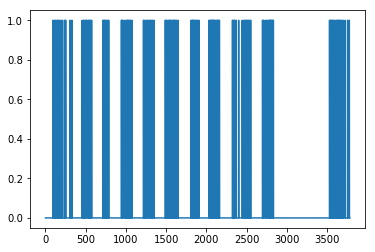

In [73]:
plt.plot(labels[26000:])
plt.show()

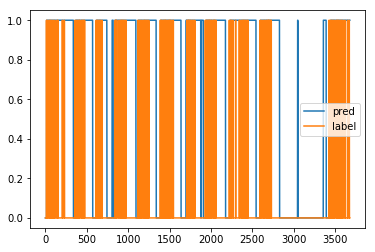

In [120]:
plt.plot(y_pred, label="pred")
#plt.plot(y_true, label="true")
plt.plot(labels[26100:], label="label")

plt.legend()
plt.show()

In [108]:
l = len(y_pred)
for x in range(0,l):
    if y_pred[x] == 0:
        y_pred[x-100:x] = 0


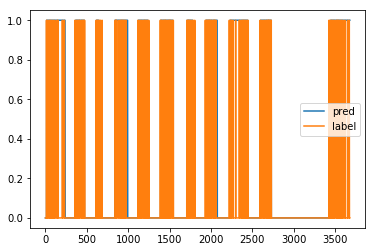

In [112]:
#plt.plot(y_true, label="true")
plt.plot(y_pred, label="pred")
plt.plot(labels[26100:], label="label")
plt.legend()
plt.show()

In [102]:
points = np.where(y_pred[:-1] - y_pred[1:] == -1)[0]
print(points)

[  13  363  615  805  839 1122 1392 1700 1712 1883 1940 2230 2600 3047 3358
 3446]


In [117]:
np.savetxt("Conv_LSTM_ypred.csv", y_pred , delimiter=",")
np.savetxt("Conv_LSTM_labels.csv", labels[26100:] , delimiter=",")

In [125]:
np.sort(np.diff(keylog_np[:,2]))

array([64, 70, 72, 75, 75, 76, 76, 80, 83, 83, 84, 85, 87, 87, 89, 89, 91,
       91, 91, 92, 92, 92, 93, 95, 96, 96, 97, 97, 99, 100, 100, 100, 101,
       101, 102, 104, 104, 104, 104, 105, 105, 106, 106, 107, 107, 107,
       107, 108, 108, 108, 108, 108, 109, 110, 111, 111, 112, 113, 113,
       114, 115, 116, 117, 117, 117, 119, 120, 120, 120, 120, 121, 121,
       122, 123, 123, 123, 124, 124, 124, 126, 126, 127, 127, 128, 128,
       128, 128, 129, 129, 129, 129, 129, 130, 130, 130, 130, 131, 131,
       131, 132, 132, 133, 133, 133, 134, 134, 135, 135, 136, 136, 136,
       137, 137, 137, 137, 138, 138, 138, 139, 139, 139, 139, 140, 140,
       140, 141, 141, 142, 142, 142, 143, 143, 144, 144, 144, 145, 145,
       146, 147, 147, 147, 147, 147, 147, 147, 148, 148, 148, 148, 149,
       149, 150, 150, 151, 152, 152, 152, 153, 153, 154, 155, 156, 156,
       156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162,
       163, 164, 164, 164, 164, 164, 165, 165, 166, 166, 1

In [127]:
pause = [1057, 1276, 1279, 1280, 1286, 1291,
       1300, 1304, 1332, 1352, 1376, 1398, 1398, 1401, 1407, 1412, 1413,
       1420, 1424, 1428, 1450, 1453, 1453, 1464, 1479, 1505, 1553, 1594,
       1617, 1618, 1631, 1638, 1645, 1659, 1713, 1825, 1846, 1861, 1872,
       1879, 1896, 1923, 1959, 2022, 2040, 2144, 2193, 2224, 2264, 2273,
       2384, 3026, 3151, 3157, 3830, 5301, 6978, 9050, 9447, 11084]
print(np.mean(pause))
print(np.std(pause))


2298.91666667
1988.94551871


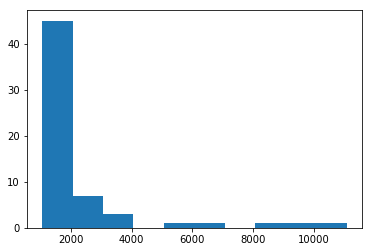

In [128]:
plt.hist(pause)
plt.show()